In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt #data graph drawing


In [ ]:
# Load the dataset
dataset_path = "Cancer_DS.csv"
df = pd.read_csv(dataset_path)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

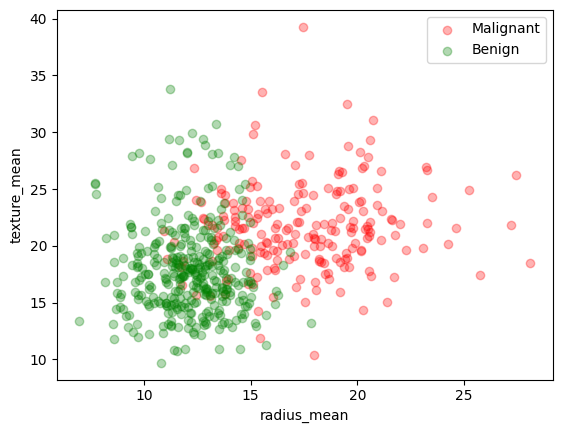

In [ ]:
M = df[df.diagnosis == "M"] #Diagnosis transfers all values of M to M data
B = df[df.diagnosis == "B"] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean, color = "green", label = "Benign", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

In [ ]:
# Encode the 'diagnosis' column (0 - B, 1 - M)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df['diagnosis'])


In [ ]:
# Split the dataset into training and testing sets
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
# Select features (attributes)
features = df.columns[2:-1]
trainX = train[features]
trainY = train['diagnosis']
testX = test[features]
testY = test['diagnosis']

In [ ]:
# Feature scaling (standardization)
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

In [ ]:
# Build the k-NN classifier
c_knn = KNeighborsClassifier(n_neighbors=3)
c_knn.fit(trainX, trainY)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions
y_pred = c_knn.predict(testX)

In [ ]:
# Evaluate the model
accuracy = metrics.accuracy_score(testY, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9590643274853801


In [ ]:
# Sample data 1 for prediction
sample = np.array([[15.78, 17.89, 103.6, 781, 0.0971, 0.1292, 0.09954, 0.06606, 0.1842, 0.06082, 0.5058, 0.9849, 3.564, 54.16, 0.005771, 0.04061, 0.02791, 0.01282, 0.02008, 0.004144, 20.42, 27.28, 136.5, 1299, 0.1396, 0.5609, 0.3965, 0.181, 0.3792, 0.1048]])
sample = scaler.transform(sample)
pred = c_knn.predict(sample)

if pred == 0:
    print('Benign')
else:
    print('Malignant')

Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Sample data 2 for prediction
sample = np.array([[11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,0.0611,0.2273,0.6329,1.52,17.47,0.00721,0.00838,0.01311,0.008,0.01996,0.002635,13.1,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408]])
sample = scaler.transform(sample)
pred = c_knn.predict(sample)

if pred == 0:
    print('Benign')
else:
    print('Malignant')

Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
